In [7]:
import pandas as pd

# File path to the parquet file
parquet_file = '../data/curated/feature_selected_rental_listings.parquet'

# Load the parquet file into a DataFrame
df = pd.read_parquet(parquet_file)

In [8]:
print(df.count())

address               196211
state                 196211
suburb                196211
bedrooms              196211
bathrooms             196211
propertyTypes         196201
carspaces             196211
date_listed           196211
latitude              190873
longitude             190873
is_new_development    196211
price                 196211
leased_date            77691
is_furnished          196211
year                  196211
month                 196211
day                   196211
days_on_market        196211
dtype: int64


In [9]:
# Convert 'is_furnished' from boolean to integer (0 and 1)
df['is_furnished'] = df['is_furnished'].astype(int)
df['is_new_development'] = df['is_new_development'].astype(int)

In [10]:
# Ensure 'date_listed' is in datetime format
df['date_listed'] = pd.to_datetime(df['date_listed'])

# Extract year from 'date_listed'
df['year'] = df['date_listed'].dt.year

# Filter for bedrooms in 1, 2, 3 and year in 2022 or 2023
filtered_df = df[(df['bedrooms'].isin([1, 2, 3])) & (df['year'].isin([2015, 2023]))]

# Display the shape and first few rows of the new DataFrame to verify
print(f"Filtered DataFrame shape: {filtered_df.shape}")
print(filtered_df.head())

Filtered DataFrame shape: (21124, 18)
                                           address state          suburb  \
507    7/25 Hotham Street, East Melbourne VIC 3002   vic  East Melbourne   
508        14/204 Whitehorse Road, Balwyn VIC 3103   vic          Balwyn   
509     281/88 Kavanagh Street, Southbank VIC 3006   vic       Southbank   
510  1807/250 Elizabeth Street, Melbourne VIC 3000   vic       Melbourne   
511      1001/43 Therry Street, Melbourne VIC 3000   vic       Melbourne   

     bedrooms  bathrooms        propertyTypes  carspaces date_listed  \
507       1.0        1.0  [apartmentUnitFlat]        0.0  2015-01-06   
508       2.0        2.0  [apartmentUnitFlat]        1.0  2015-01-06   
509       2.0        1.0  [apartmentUnitFlat]        1.0  2015-01-06   
510       2.0        1.0  [apartmentUnitFlat]        0.0  2015-01-06   
511       1.0        1.0  [apartmentUnitFlat]        0.0  2015-01-06   

      latitude   longitude  is_new_development  price leased_date  \
507

In [11]:
# Display unique counts for 'bathrooms'
bathroom_counts = df['bathrooms'].value_counts()
print("Bathroom Counts:")
print(bathroom_counts)
print()

# Display unique counts for 'bedrooms'
bedroom_counts = df['bedrooms'].value_counts()
print("Bedroom Counts:")
print(bedroom_counts)
print()

# Display unique counts for 'carspaces'
carspace_counts = df['carspaces'].value_counts()
print("Carspace Counts:")
print(carspace_counts)



Bathroom Counts:
bathrooms
1.0    117301
2.0     72541
3.0      5773
4.0       492
5.0        83
6.0        18
7.0         3
Name: count, dtype: int64

Bedroom Counts:
bedrooms
2.0     70498
3.0     66280
1.0     32372
4.0     23788
5.0      2840
6.0       351
7.0        64
8.0        17
10.0        1
Name: count, dtype: int64

Carspace Counts:
carspaces
1.0      96326
2.0      55004
0.0      35152
3.0       4872
4.0       3777
5.0        469
6.0        434
7.0         65
8.0         64
10.0        22
11.0         8
9.0          7
12.0         5
16.0         1
32.0         1
43.0         1
22.0         1
375.0        1
14.0         1
Name: count, dtype: int64


In [12]:
# Select only numerical columns
numerical_df = filtered_df.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numerical_df.corr()

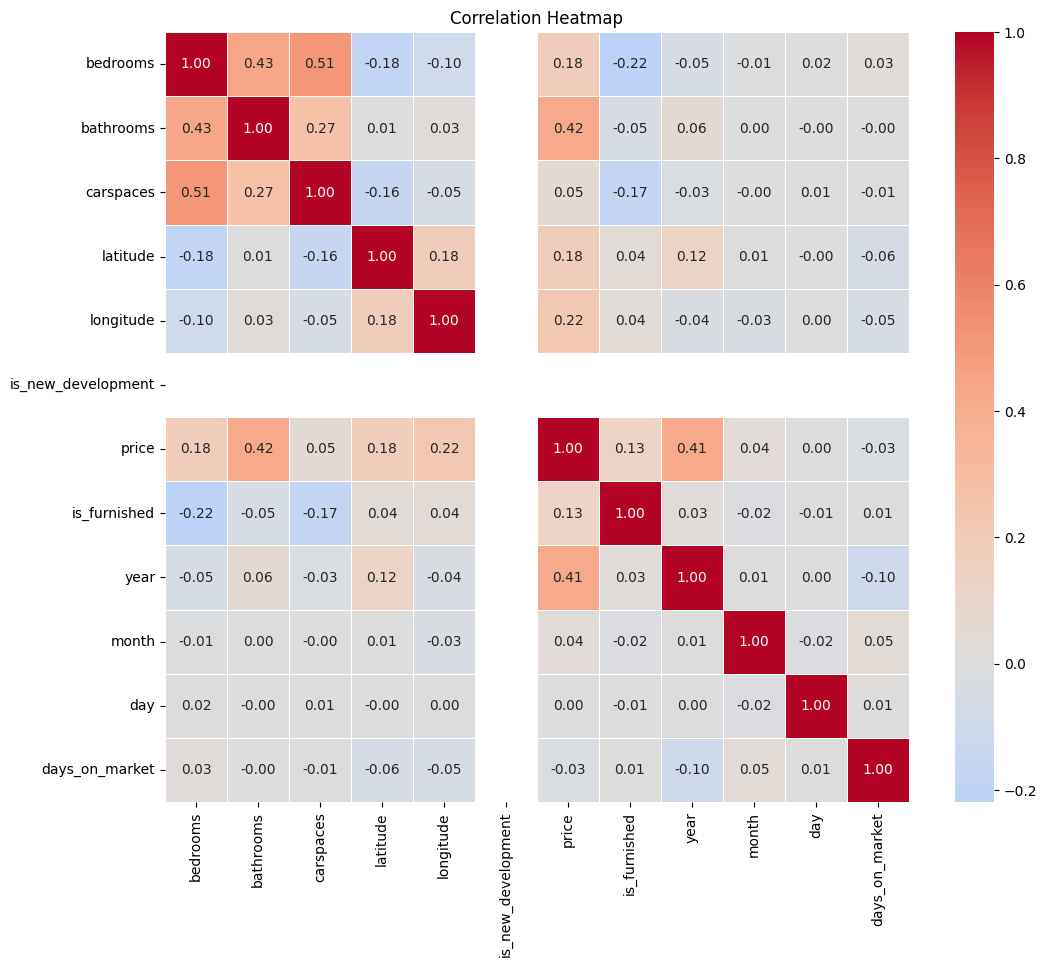

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, linewidths=0.5)

# Add title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()


Updated Correlation Matrix:
                    bedrooms  bathrooms  carspaces  latitude  longitude  \
bedrooms            1.000000   0.452583   0.548008 -0.129768  -0.130801   
bathrooms           0.452583   1.000000   0.271974  0.000823   0.024853   
carspaces           0.548008   0.271974   1.000000 -0.143326  -0.081414   
latitude           -0.129768   0.000823  -0.143326  1.000000   0.098130   
longitude          -0.130801   0.024853  -0.081414  0.098130   1.000000   
is_new_development       NaN        NaN        NaN       NaN        NaN   
price               0.286818   0.416160   0.113840  0.049206   0.224500   
is_furnished       -0.234448  -0.080113  -0.208903  0.043716   0.050512   
year                0.016508  -0.001780   0.030312  0.018338  -0.004614   
month              -0.012240   0.015626  -0.013612  0.015260   0.038769   
day                -0.002002   0.001736  -0.004269  0.005527   0.014529   
days_on_market      0.001877  -0.004832  -0.020710 -0.007553   0.003396 

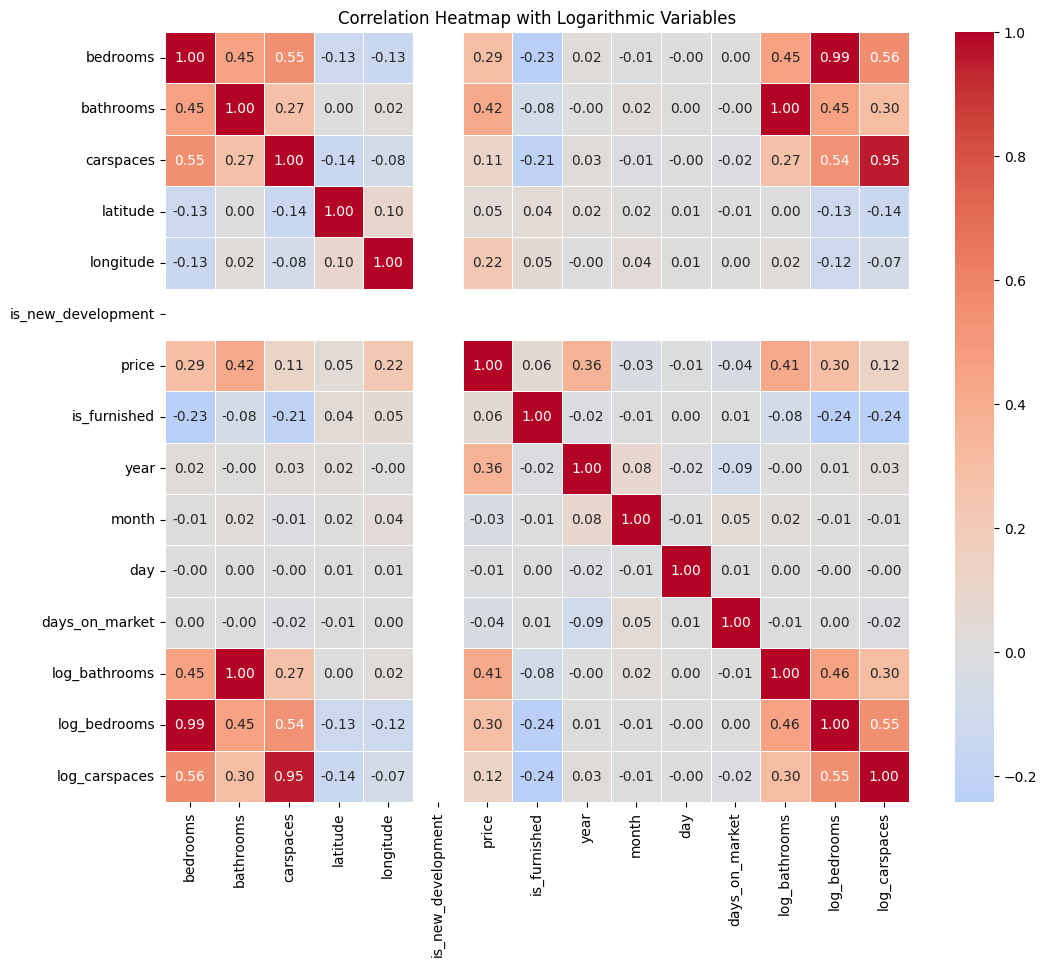

In [14]:
import numpy as np

# Handle cases where values might be zero or negative for log transformation
# We can add a small constant (e.g., 1) to avoid log(0) issues
df['log_bathrooms'] = np.log(df['bathrooms'] + 1)
df['log_bedrooms'] = np.log(df['bedrooms'] + 1)
df['log_carspaces'] = np.log(df['carspaces'] + 1)

# Ensure 'date_listed' is in datetime format
df['date_listed'] = pd.to_datetime(df['date_listed'])

# Extract year from 'date_listed'
df['year'] = df['date_listed'].dt.year

# Filter for bedrooms in 1, 2, 3 and year in 2022 or 2023
filtered_df = df[(df['bedrooms'].isin([1, 2, 3])) & (df['year'].isin([2020, 2023]))]

# Select only numerical columns, including new log variables
numerical_df = filtered_df.select_dtypes(include=['number'])

# Compute the correlation matrix for the numerical variables
correlation_matrix = numerical_df.corr()

# Display the updated correlation matrix
print("Updated Correlation Matrix:")
print(correlation_matrix)

# Optionally, plot the updated correlation matrix heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, linewidths=0.5)

# Add title
plt.title('Correlation Heatmap with Logarithmic Variables')

# Show the plot
plt.show()

In [15]:
# Group by 'suburb' and calculate the median days on market
suburb_stats = filtered_df.groupby('suburb')['days_on_market'].median().reset_index()
suburb_stats = suburb_stats.sort_values(by='days_on_market')

# Display the first few suburbs with the shortest median days on market
print(suburb_stats.head(10))

                suburb  days_on_market
160          Eaglemont             0.0
279        Maryborough             0.5
139         Daylesford             1.0
465        Wattle Glen             1.0
343             Olinda             3.0
49             Bittern             5.0
400        Smythesdale             6.0
270            Macleod             8.0
22   Aspendale Gardens             8.0
476         Whittlesea             8.0


In [17]:
# Create a mapping of suburb to the median days on market
suburb_median_mapping = suburb_stats.set_index('suburb')['days_on_market'].to_dict()

# Map the suburb to their median days on market
filtered_df['suburb_encoded'] = filtered_df['suburb'].map(suburb_median_mapping)

# Display the first few rows to verify
print(filtered_df[['suburb', 'suburb_encoded']].head())


        suburb  suburb_encoded
967  Melbourne            22.0
968   St Kilda            22.0
969  Melbourne            22.0
970  Melbourne            22.0
971  Melbourne            22.0


/tmp/ipykernel_857/2028193118.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['suburb_encoded'] = filtered_df['suburb'].map(suburb_median_mapping)


In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import KBinsDiscretizer
from scipy.stats import chi2_contingency

# Copy the DataFrame to avoid modifying the original one
test_df = filtered_df.copy()

# Discretize 'days_on_market' into 3 categories: low, medium, high
# Here we'll use quantiles to ensure roughly equal counts in each bin
test_df['market_category'] = pd.qcut(test_df['days_on_market'], q=3, labels=['low', 'medium', 'high'])

# Display the count of listings in each category
print(test_df['market_category'].value_counts())

# Perform the chi-square test
# Create a contingency table of 'suburb' vs. 'market_category'
contingency_table = pd.crosstab(test_df['suburb'], test_df['market_category'])

# Run the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square Statistic: {chi2}")
print(f"Degrees of Freedom: {dof}")
print(f"P-value: {p}")

# Interpretation
if p < 0.05:
    print("There is a statistically significant association between 'suburb' and 'days_on_market' categories.")
else:
    print("There is no statistically significant association between 'suburb' and 'days_on_market' categories.")


market_category
medium    9756
low       9180
high      8348
Name: count, dtype: int64
Chi-square Statistic: 12295.825167259554
Degrees of Freedom: 974
P-value: 0.0
There is a statistically significant association between 'suburb' and 'days_on_market' categories.


In [19]:
import geopandas as gpd
import folium
from folium import Choropleth

# Load the shapefile or GeoJSON containing suburb boundaries
# This file should contain a geometry column with suburb shapes
suburbs_gdf = gpd.read_file('path_to_victoria_suburbs_shapefile.shp')

# Step 1: Calculate the median days_on_market for each suburb
# Merge the median days_on_market data with the suburbs GeoDataFrame
median_days_on_market = test_df.groupby('suburb')['days_on_market'].median().reset_index()
suburbs_gdf = suburbs_gdf.merge(median_days_on_market, left_on='suburb_name_column_in_shapefile', right_on='suburb')

# Step 2: Create the Folium map centered around Victoria
m = folium.Map(location=[-37.8136, 144.9631], zoom_start=8)

# Step 3: Add a choropleth layer to show median days_on_market by suburb
Choropleth(
    geo_data=suburbs_gdf,
    data=suburbs_gdf,
    columns=['suburb_name_column_in_shapefile', 'days_on_market'],
    key_on='feature.properties.suburb_name_column_in_shapefile',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Median Days on Market by Suburb'
).add_to(m)

# Step 4: Add markers for individual listings if desired
for idx, row in test_df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=3,
        color='blue',
        fill=True,
        fill_opacity=0.6,
        popup=f"{row['suburb']}: {row['days_on_market']} days"
    ).add_to(m)

# Step 5: Save the map to an HTML file
m.save('days_on_market_by_suburb_map.html')

# Display the map in the notebook (if running in a Jupyter environment)
m


DriverError: Failed to open dataset (flags=68): path_to_victoria_suburbs_shapefile.shp